
# Classical action

$$S(x,\dot{x}) = \int_{t_1}^{t_2}L(x,\dot{x},t)dt=\int_{t_1}^{t_2}(K-V)dt$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 80 # number of points of the path (doesn't scale well beyond 100)
t1 = 0 # initial time
t2 = 7 # final time
x1 = 0 # initial position
x2 = 10 # final position
DX = x2 - x1 # total position increment
t = np.linspace(t1,t2,N) # from x1 to x2 in N-1 intervals (and N points)
x = np.random.rand(N)*DX # random initial distribution
x[0] = x1; x[-1] = x2; # fixed boundaries
dt = (t2-t1) / (N-1) # time step
v0 = (x2 - x1)/(t2 - t1) + (t2 - t1)/2 # initial speed according to kinematics

In [3]:
# velocities
def v(xx): # non-centred version (works better for initial conditions)
    uve = np.diff(xx)/dt
    uve = np.append(uve,(x[-1]-x[-2])/dt)
    return uve
#def v(xx): # centred version
#    uve = np.empty(N-2)
#    uve = (xx[2:]-xx[:-2])/dt/2
#    uve = np.append(uve,(x[-1]-x[-2])/dt)
#    uve = np.insert(uve,0,(x[1]-x[0])/dt)
#    return uve

In [4]:
# Lagrangian
def V(xx):
    #return 10*np.exp(-(xx-5)**2/(2*1**2)) # Gaussian potential
    return xx # uniform gravitational potential (m=g=1)
def K(xx):
    return v(xx)**2/2 # kinetic energy (m=1)
def L(xx):
    return K(xx) - V(xx)
def Energy(xx):
    return K(xx) + V(xx)

In [5]:
# Action
def S(xx):
    return L(xx).sum()*dt

In [11]:
# loop
ep = 0.001 # interval to calculate gradient
eta = 0.001 # learning rate
Sprev = S(x) # initial action
print(f"S_i={Sprev:.8f}")
loops = 10000;
grad = np.zeros_like(x)
for it in range(loops):
    for i in range(1,N-1):
        x[i] += ep
        Splus = S(x) # action ahead
        x[i] -= 2*ep
        Sminus = S(x) # action behind
        x[i] += ep  # restore
        grad[i] = (Splus - Sminus) / (2 * ep) # gradient
    x -= eta * grad # move against the gradient, proportionally to η
Snow = S(x) # final action (rerun to continue from here)
print(f"S_f={Snow:.8f}")

S_i=-42.49775437
S_f=-42.49781383


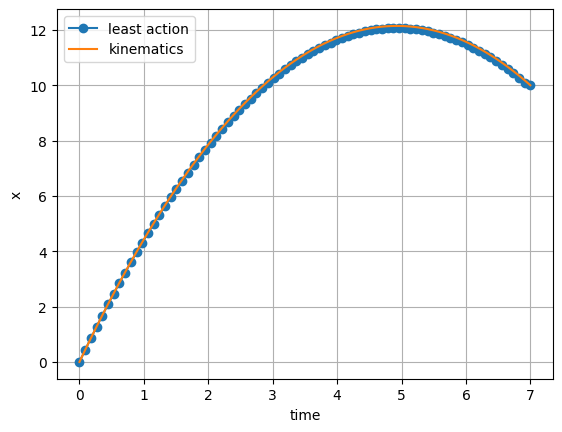

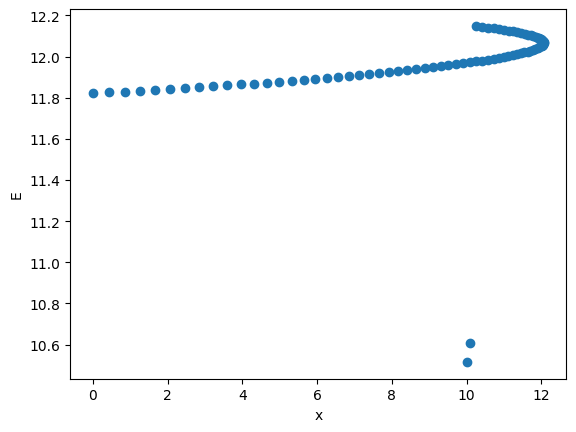

In [12]:
plt.figure(1) # compare our result with pure kinematics
plt.xlabel("time")
plt.ylabel("x")
plt.plot(t,x,'o-',label="least action")
#plt.plot(t,np.gradient(x,t),'o-',label="velocity")
plt.plot(t,x1+v0*t-0.5*t**2, label="kinematics");
plt.legend()
plt.grid()
#plt.figure(2) # plot V(x)
#plt.xlabel("x")
#plt.ylabel("V")
#xplot=np.linspace(x1,x2,N)
#plt.plot(xplot,V(xplot),'o')
plt.figure(3) # plot energy vs x
plt.xlabel("x")
plt.ylabel("E")
plt.plot(x,Energy(x),'o'); # energy not well controlled